In [1]:
import os
import src

from typing import DefaultDict, Counter
import matplotlib.pyplot as plt

In [2]:
train_data_path = 'data/raw/train.txt'
dev_data_path = 'data/raw/dev.txt'

In [3]:
def analyze(data_dir: str):
    file = open(data_dir, 'rt')
    lines, tags = [[]], DefaultDict(int)
    n_words = 0
    word_tags = DefaultDict(set)
    
    for line in file:
        line = line.strip()
        info = line.split()
        
        if not line:
            lines.append([])
            continue
        
        word, tag = info[0], info[-1]
        tags[tag] += 1
        
        lines[-1].append(word)
        n_words += 1
        word_tags[word].add(tag.split('-')[-1])
    
    print('Total lines:', len(lines))
    print('Total words:', n_words)
    
    # multiple tag words
    multi_tag_words = src.utils.multi_tag_words(word_tags)
    print('Words having multiple tags:', len(multi_tag_words))
    
    print('Total tags:', len(tags))
    print('Tags:', list(tags.keys()))
    print('"O" tags:', tags['O'])
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.pie(tags.values(), labels=tags.keys())
    ax1.title.set_text(f'Tag distribution from {data_dir.split()[-1]}')
    
    temp_dist = {k:v for k, v in tags.items() if k!='O'}
    ax2.pie(temp_dist.values(), labels=temp_dist.keys())
    ax1.title.set_text(f'Tag distribution without "O" from {data_dir.split()[-1]}')
    plt.show()
    
    # sentence length distribution
    plt.figure(figsize=(12, 5))
    print(lines[0])
    sentence_lengths = Counter(map(len, lines))
    plt.bar(sentence_lengths.keys(), sentence_lengths.values())
    plt.ylabel('Frequency')
    plt.xlabel('Number of words')
    plt.title('Sentence length distribution (number of words)')
    plt.show()

Total lines: 15300
Total words: 191897
Words having multiple tags: 4169
Total tags: 13
Tags: ['O', 'B-LOC', 'B-GRP', 'I-GRP', 'B-PROD', 'B-CW', 'I-CW', 'B-CORP', 'B-PER', 'I-PER', 'I-CORP', 'I-PROD', 'I-LOC']
"O" tags: 160250


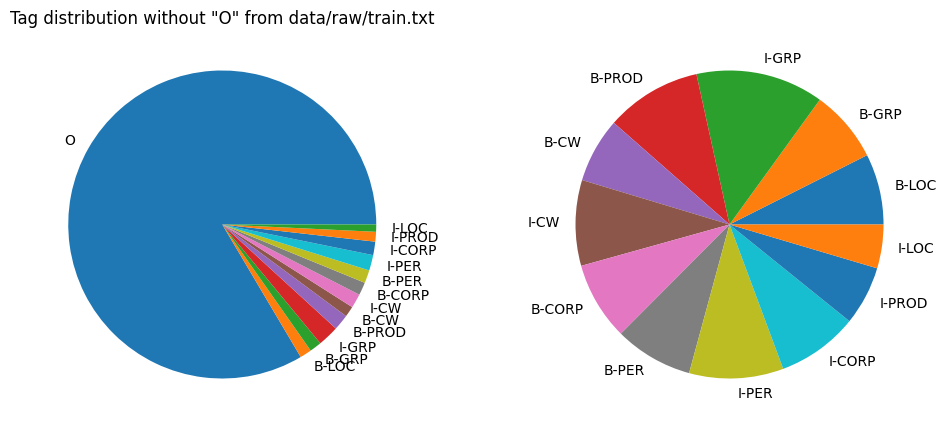

['তার', 'মৃত্যুর', 'দশ', 'দিন', 'পর,', '১১৫', 'কৃষ্ণাঙ্গ', 'উচ্চ', 'বিদ্যালয়ের', 'শিক্ষার্থীরা', 'তার', 'হত্যার', 'প্রতিবাদে', 'ম্যাককম্ব', 'এর', 'মাধ্যমে', 'মিছিল', 'করেছে।']


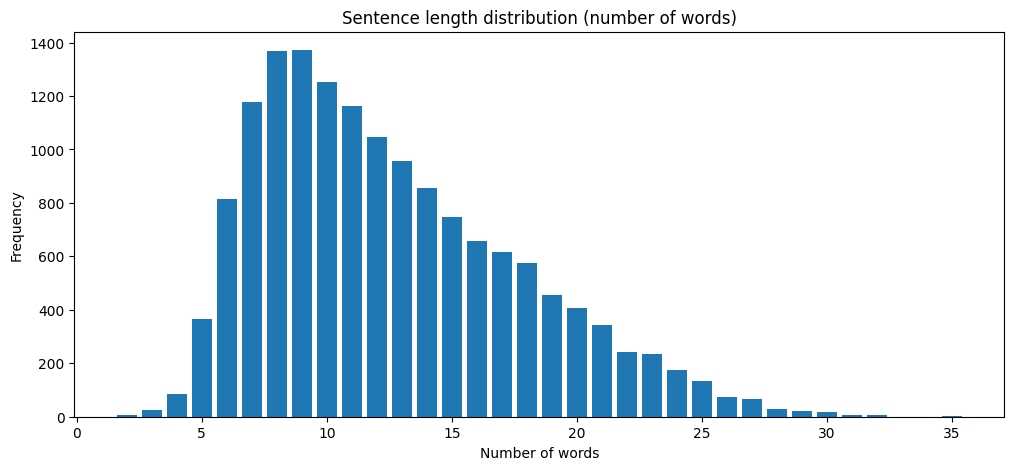

In [4]:
analyze(train_data_path)

Total lines: 800
Total words: 10333
Words having multiple tags: 259
Total tags: 13
Tags: ['O', 'B-GRP', 'I-GRP', 'B-PROD', 'B-LOC', 'I-LOC', 'I-PROD', 'B-CORP', 'B-PER', 'I-PER', 'B-CW', 'I-CW', 'I-CORP']
"O" tags: 8654


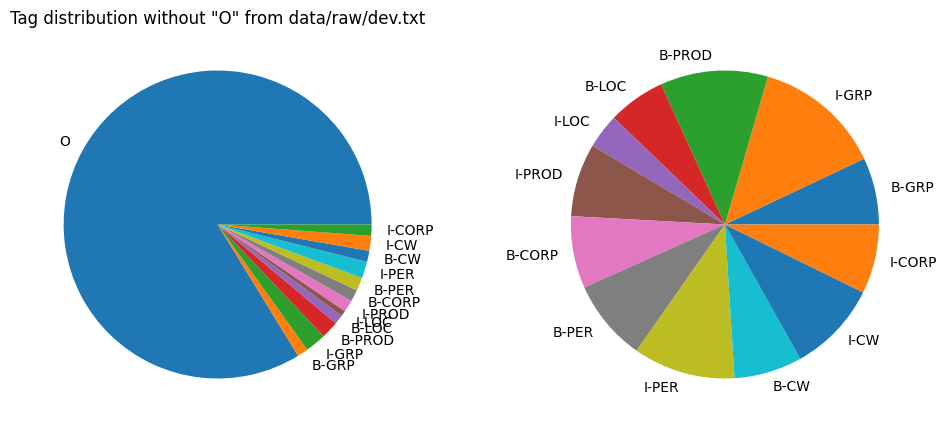

['তিনি', 'যুবক', 'হিসেবে', 'শেফিল্ড', 'বুধবার', 'এফ.সি.', 'যোগদান', 'করেন', 'এবং', '১৯৫১', 'সালে', 'তাদের', 'পেশাগত', 'দিক', 'দিয়ে', 'আত্মপ্রকাশ', 'করেন।']


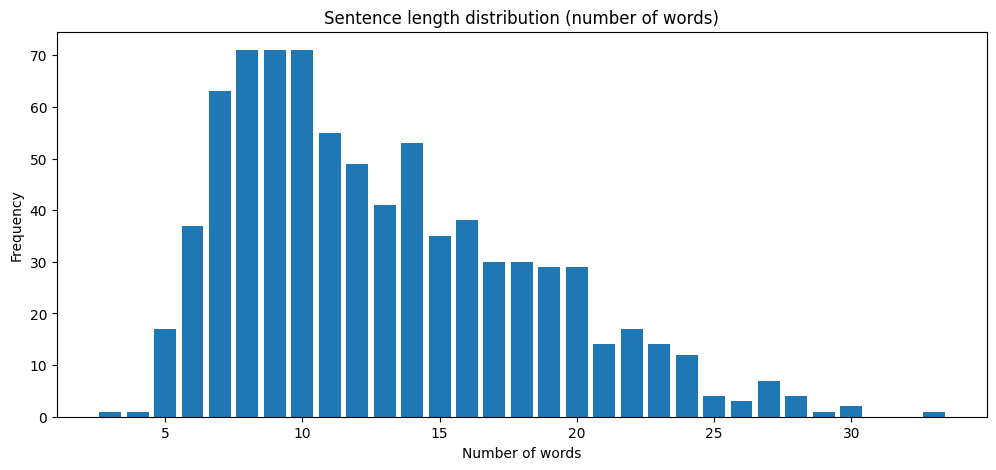

In [5]:
analyze(dev_data_path)